In [1]:
# from pathlib import Path

# repository_path = Path('..').resolve()

# !pip install -Uqq {repository_path}
# %pip install -e ..
    


# !export PYTHONPATH=$PYTHONPATH:{repository_path}
# !echo $PYTHONPATH

<a target="_blank" href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/walkthrough.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import glider.visualize as visualize
import glider.vehicle as vehicle

import mediapy as media

This is a genetic algorithm to optimise a glider form.



There are 3 different reproduction modes:
- Mutation
- Cloning
- Cross-over

The first mode, mutation, creates offspring that vary according to the MUTATION_RATIO, here 5%. 

Let's try it out!

""

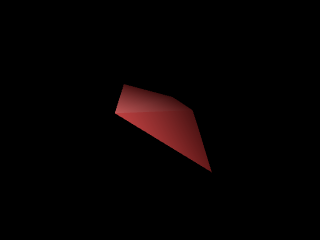

""

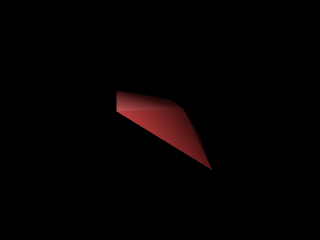

In [3]:
v = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

v2 = vehicle.Vehicle(
    vertices=v.mutate(),
)
media.show_image(visualize.view_vehicle(*v2.create_glider_from_vertices()))

These will be similar to the parents, but not the same, allowing us to whittle into adjacent niches.

Cross-over allows us to take a set of genes from one parent, and a set of genes from the other, resulting in a hybrid.

The idea is to take existing "features" from both gliders and combine them to create new solution tips.

""

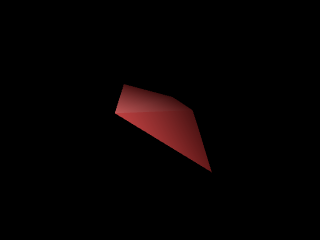

""

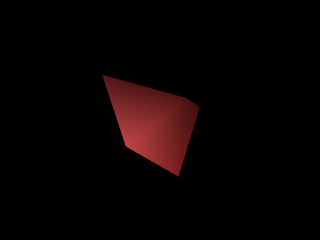

""

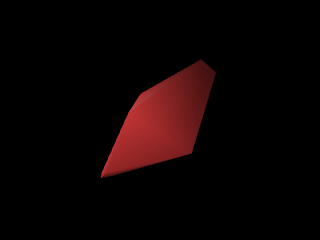

In [4]:
# Here is an example of cross-over reproduction:

v1 = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=0.5,
    )
media.show_image(visualize.view_vehicle(*v.create_glider_from_vertices()))

v2 = vehicle.Vehicle(
    num_vertices=10,
    max_dim_m=5.0,
)
media.show_image(visualize.view_vehicle(*v2.create_glider_from_vertices()))

v3 = vehicle.Vehicle(
    vertices=v2.cross_over(v1),
)
media.show_image(visualize.view_vehicle(*v3.create_glider_from_vertices()))

In [5]:
from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle

frames = []

population = [] 
for i in range(300):
    population = iterate_population(
        population,
        population_size = 100,
        survival_weight = 0.4,
        cloning_weight = 0.4,
    )

    if i % 10 == 0:
        print("Iteration:", i)
        winning_genes = population[0]
        print("Fitness:", fitness_func(winning_genes))
        # vehicle.Vehicle(vertices=winning_genes).show()
        frames.append(view_vehicle(*vehicle.Vehicle(vertices=winning_genes).create_glider_from_vertices()))


AttributeError: 'list' object has no attribute 'mutate'

In [ ]:
media.show_video(frames, fps=3)

""

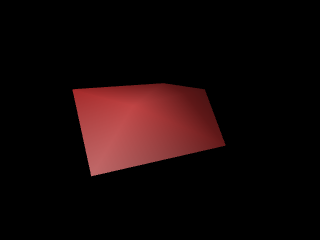

In [ ]:
v = vehicle.Vehicle(vertices=population[0])
v.show()

In [ ]:
import glider.simulation as sim

glider_xml, glider_asset = v.create_glider_from_vertices()
world_xml = sim.drop_test_glider(glider_xml, glider_asset)

from pathlib import Path

p = Path('../assets/worlds/drop_test.xml').resolve()
p.parent.mkdir(parents=True, exist_ok=True)

with open('../assets/worlds/drop_test.xml', 'w') as f:
    f.write(world_xml)